# Introduction
The Pima Indians Diabetes Dataset is a widely used dataset in machine learning, particularly for classification tasks. It originates from the National Institute of Diabetes and Digestive and Kidney Diseases and focuses on the health records of Pima Indian women who are at least 21 years old. The dataset's primary goal is to predict whether a patient has diabetes based on several diagnostic measurements.

Key features of the dataset include:

* **Pregnancies:** Number of times pregnant.
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
* **BloodPressure:** Diastolic blood pressure (mm Hg).
* **SkinThickness:** Triceps skin fold thickness (mm).
* **Insulin:** 2-Hour serum insulin (mu U/ml).
* **BMI:** Body mass index (weight in kg/(height in m)^2).
* **DiabetesPedigreeFunction:** Diabetes pedigree function.
* **Age:** Age (years).
* **Outcome:** Class variable (0 or 1), where 1 indicates the presence of diabetes.

This activity provides hands-on experience in the core workflow of deep learning. 

* Analyze a given dataset to understand its structure and features.

* Implement a deep learning neural network for analysis and prediction.

* Evaluate the results of the neural network model to understand its performance.

## Load the dataset

In [4]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Perform basic data analysis

In [5]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Display basic statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check the distribution of the target variable
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Preprocessing the data

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Implementing a deep learning neural network

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

2025-03-05 22:22:22.429877: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ajmei/Projects/DataScience_AI_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.4420 - loss: 0.7007 - val_accuracy: 0.6429 - val_loss: 0.6723
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6731 - loss: 0.6517 - val_accuracy: 0.6429 - val_loss: 0.6648
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6456 - loss: 0.6505 - val_accuracy: 0.6299 - val_loss: 0.6514
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6482 - loss: 0.6331 - val_accuracy: 0.6429 - val_loss: 0.6405
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6418 - loss: 0.6244 - val_accuracy: 0.6299 - val_loss: 0.6285
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6691 - loss: 0.5953 - val_accuracy: 0.6558 - val_loss: 0.6176
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6864 - loss: 0.5936 - val_accuracy: 0.6558 - val_loss: 0.6057
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6836 - loss: 0.5795 - val_accuracy: 0.6558 -

### Evaluating the results

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7354 - loss: 0.5235
Test Accuracy: 0.7662337422370911


### Plot Accuracy and Loss

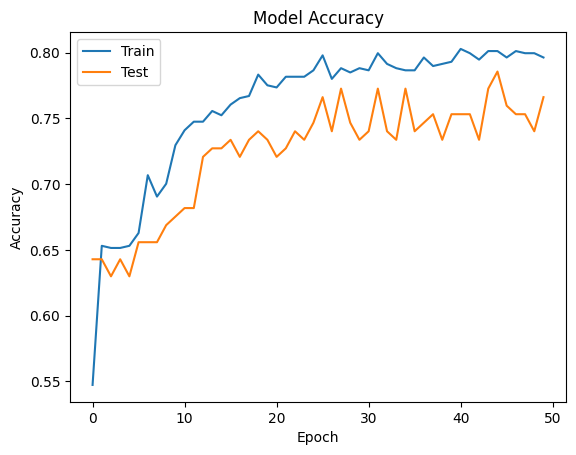

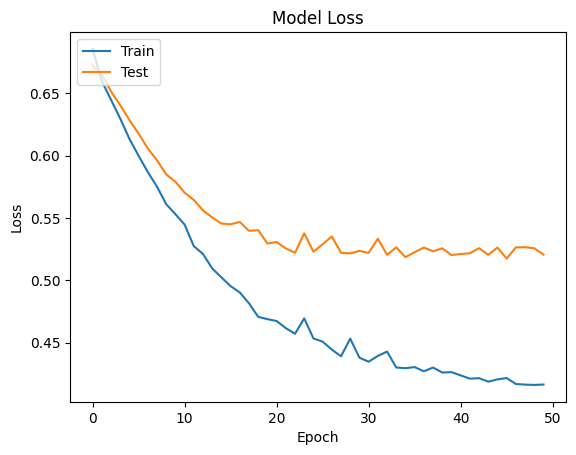

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()